In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [3]:
import scipy.misc

(100, 212)
117
int64


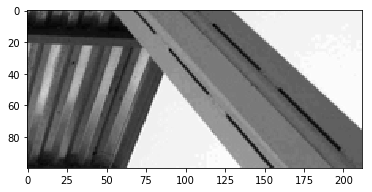

In [4]:
ascent = scipy.misc.ascent()
plt.gray()
plt.imshow(ascent, interpolation='nearest')
cropped_ascent = ascent[:100, 300:]
plt.imshow(cropped_ascent, interpolation='nearest')
print(cropped_ascent.shape)
print(cropped_ascent[90,90])
print(cropped_ascent.dtype)

torch.Size([100, 212])
117.0

 117
[torch.DoubleTensor of size 1]

torch.Size([1, 100, 212])

 117
 117
 117
[torch.FloatTensor of size 3]

torch.Size([3, 100, 212])


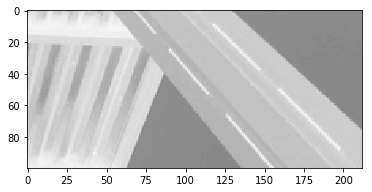

In [5]:
img = torch.from_numpy(cropped_ascent.astype(float))
print(img.size())
print(img[90,90])
img = img.clone().view(1,100,212)
print(img[:,90,90])
print(img.size())
img = torch.cat((img, img, img), 0).float()
show(img)
print(img[:,90,90])
img.div_(255);
print(img.size())

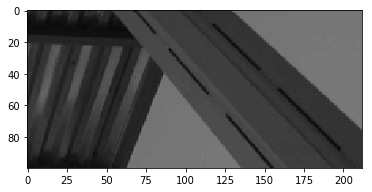

In [6]:
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(img))

torch.Size([3, 256, 542])


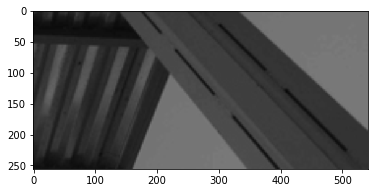

In [7]:
img2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Scale(256),
    transforms.ToTensor(),
])(img)
print(img2.size())
show(img2)

In [8]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
cifar = dset.CIFAR10(root="abc/def/ghi", download=True)

svhn = dset.SVHN(root="SVHN", download=True)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
trans = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [10]:
import torchvision.utils as tutils

(0.3550691984734537, 0.23427983763429217, 0.0, 1.0)
(0.46767387686607736, 0.2716278526805815, 0.0, 0.9960784316062927)
(0.3873455432161184, 0.33328919160140946, 0.0, 1.0)
(0.2814785101333352, 0.17316719130212327, 0.0, 0.9176470637321472)
(0.3747127844444549, 0.263550994000993, 0.0, 0.9960784316062927)
(0.3180402444698605, 0.2527873573260127, 0.0, 0.9882352948188782)
(0.3895910023002216, 0.2652758908866722, 0.0, 0.9764705896377563)
(0.42366984310380457, 0.2704650411207236, 0.0, 0.9725490212440491)
(0.4461652455223278, 0.3333273095492855, 0.0, 0.9882352948188782)
(0.18080959424817897, 0.1979833097490185, 0.0, 0.8549019694328308)
(0.24891621397061195, 0.1262114461460207, 0.0, 0.5098039507865906)
(0.5196678517865317, 0.28957326492643176, 0.0, 0.9960784316062927)
(0.46618924500914244, 0.3040634281153846, 0.0, 0.9843137264251709)
(0.2865081246803432, 0.3059297005720377, 0.0, 0.95686274766922)
(0.3088516219293827, 0.2211848388758483, 0.0, 1.0)
(0.4323580585150921, 0.2737621117885012, 0.0, 1.0

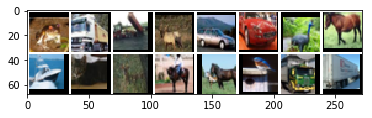

In [11]:
transformed_images = []
for i in range(20):
    transformed_images += [trans(cifar[i][0])]
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))

(0.21912403590007065, 0.11549510463530245, 0.0, 0.42352941632270813)
(0.24756817432353273, 0.12481099270218911, 0.0, 0.43921568989753723)
(0.6500089434545467, 0.3417722463834584, 0.0, 1.0)
(0.624965539847229, 0.3781107728347163, 0.0, 1.0)
(0.4295062445356355, 0.209926799041936, 0.0, 0.658823549747467)
(0.4523016382105804, 0.16097328373917752, 0.0, 0.658823549747467)
(0.33089640462518827, 0.18129542028105292, 0.0, 0.7098039388656616)
(0.3781237341512072, 0.14145414026378747, 0.0, 0.7019608020782471)
(0.3112821760344862, 0.1444414451152121, 0.0, 0.5686274766921997)
(0.2894531317154663, 0.13765290046189663, 0.0, 0.5686274766921997)
(0.3085592901722218, 0.11878249972050894, 0.0, 0.48235294222831726)
(0.30727380128519144, 0.12536373863468053, 0.0, 0.47843137383461)
(0.3474928611103678, 0.20607566988885812, 0.0, 0.7686274647712708)
(0.4193333965376951, 0.21516177303689668, 0.0, 0.7176470756530762)
(0.579711771987301, 0.2276613518530638, 0.0, 0.8196078538894653)
(0.5174466553047145, 0.2754570

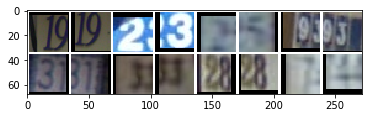

In [12]:
transformed_images1 = []
for i in range(20):
    transformed_images1 += [trans(svhn[i][0])]
    print(transformed_images1[i].mean(),transformed_images1[i].std(), 
          transformed_images1[i].min(), transformed_images1[i].max())
show(tutils.make_grid(transformed_images1))

(-0.2898616092085528, 0.4685596798812426, -1.0, 1.0)
(-0.0646522495856819, 0.5432557088173222, -1.0, 0.9921568632125854)
(-0.22530891961650923, 0.6665783868075934, -1.0, 1.0)
(-0.43704298804126057, 0.3463343869888244, -1.0, 0.8352941274642944)
(-0.25057443605813506, 0.5271019919332909, -1.0, 0.9921568632125854)
(-0.3639195195088784, 0.5055747197978426, -1.0, 0.9764705896377563)
(-0.22081799902177104, 0.5305517846524678, -1.0, 0.9529411792755127)
(-0.15266031884433082, 0.5409300868953164, -1.0, 0.9450980424880981)
(-0.10766951208158086, 0.6666546217339521, -1.0, 0.9764705896377563)
(-0.6383808222987378, 0.39596662214995665, -1.0, 0.7098039388656616)
(-0.5021675792522728, 0.25242289498582365, -1.0, 0.019607901573181152)
(0.0393357000236089, 0.5791465343312241, -1.0, 0.9921568632125854)
(-0.06762151311462124, 0.608126859305216, -1.0, 0.9686274528503418)
(-0.4269837594474666, 0.6118594055483019, -1.0, 0.9137254953384399)
(-0.3822967633216952, 0.44236968230721285, -1.0, 1.0)
(-0.13528388499

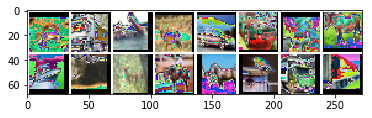

In [13]:
for i in range(20):
    transformed_images[i] = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_images[i])
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))

(-0.5617519390846913, 0.2309902134193062, -1.0, -0.15294116735458374)
(-0.5048636594826045, 0.2496219893768995, -1.0, -0.12156862020492554)
(0.300017885863781, 0.6835444941877908, -1.0, 1.0)
(0.24993107927730307, 0.7562215461093454, -1.0, 1.0)
(-0.14098751092872894, 0.419853598083872, -1.0, 0.3176470994949341)
(-0.09539672357883926, 0.32194656747835504, -1.0, 0.3176470994949341)
(-0.3382071938443308, 0.36259084259466673, -1.0, 0.41960787773132324)
(-0.2437525358206282, 0.2829082854784642, -1.0, 0.40392160415649414)
(-0.3774356512973706, 0.2888828928041203, -1.0, 0.13725495338439941)
(-0.421093744400423, 0.2753058075903499, -1.0, 0.13725495338439941)
(-0.38288142283757526, 0.23756500202620637, -1.0, -0.03529411554336548)
(-0.3854524021153338, 0.25072748088802643, -1.0, -0.04313725233078003)
(-0.3050142794963904, 0.41215134138060405, -1.0, 0.5372549295425415)
(-0.16133320717684305, 0.43032354630252656, -1.0, 0.43529415130615234)
(0.15942354397460198, 0.4553227037061276, -1.0, 0.639215707

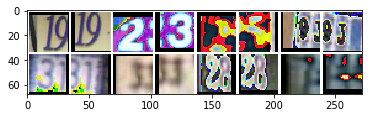

In [14]:
for i in range(20):
    transformed_images1[i] = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_images1[i])
    print(transformed_images1[i].mean(),transformed_images1[i].std(), 
          transformed_images1[i].min(), transformed_images1[i].max())
show(tutils.make_grid(transformed_images1))